# Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('/kaggle/input/hotel-bookings/hotel_bookings.csv')

In [3]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Data Cleaning

In [6]:
df.shape

(119390, 32)

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
df.drop(['agent','company'],axis=1,inplace=True)

In [9]:
df['country'].value_counts().index[0]

'PRT'

In [10]:
df['country'].fillna(df['country'].value_counts().index[0],inplace=True)

In [11]:
df.fillna(0,inplace=True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Data visualization

In [13]:
filter1=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [14]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [15]:
data=df[~filter1]

In [16]:
df[df['children']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


## Lets perform Spatial Analysis

In [17]:
df['is_canceled'].unique()

array([0, 1])

In [18]:
df[df['is_canceled']==0]['country'].value_counts()/75011

PRT    0.286518
GBR    0.128994
FRA    0.113063
ESP    0.085201
DEU    0.080908
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [19]:
len(df[df['is_canceled']==0])

75166

In [20]:
country_wise_df=df[df['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_df.columns=['country','no_of_guests']
country_wise_df

,country,no_of_guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [21]:
!pip install plotly

In [22]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.6 MB/s eta 0:00:00


In [23]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)

In [24]:
map_guest=px.choropleth(country_wise_df,
             locations=country_wise_df['country'],
             color=country_wise_df['no_of_guests'],
              hover_name=country_wise_df['country'],
              title='home country of guests'
             )

In [25]:
map_guest.show()

### How much do guests pay for a room per night ?

In [26]:
df2=df[df['is_canceled']==0]

In [27]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price( EUR)')

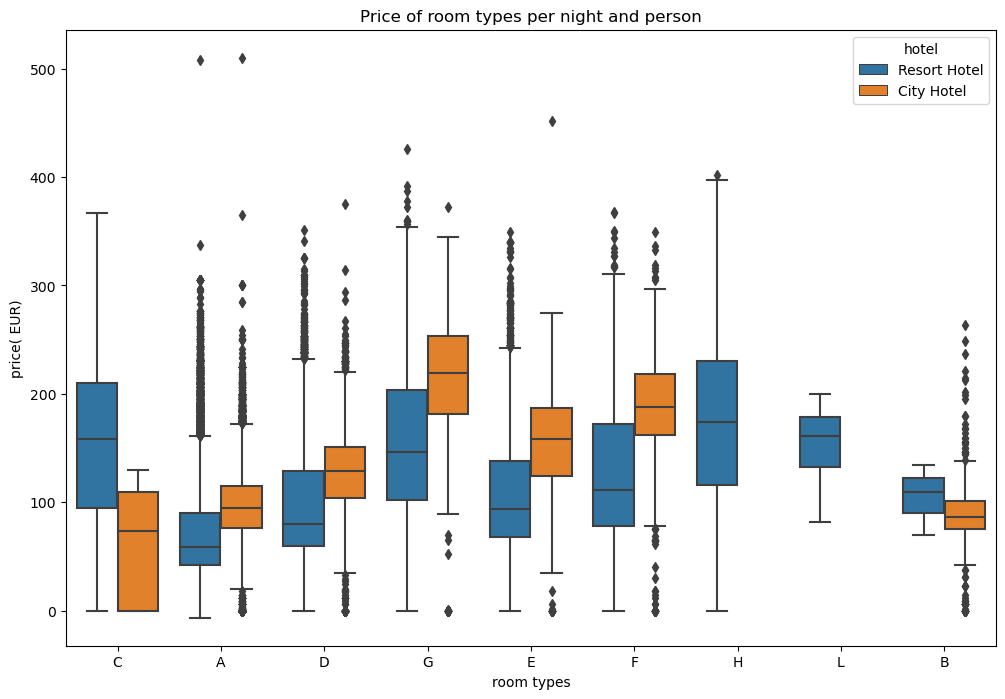

In [28]:
# seaborn boxplot:

plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr' ,hue='hotel',data=df2)

plt.title('Price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price( EUR)')

### Which are the most busy month ?

In [29]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [30]:
df_resort=df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]
df_city = df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)]

In [31]:
df_resort.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [32]:
rush_resort=df_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [33]:
rush_city=df_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no_of_guests']
rush_city

,month,no_of_guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [34]:
final_rush=rush_resort.merge(rush_city,on='month')

In [35]:
final_rush.columns=['month','no_of_guests_in_resort','no_of_guests_city']

In [36]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [37]:
!pip install sorted-months-weekdays

  Preparing metadata (setup.py) ... - done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=cfb6560dd23bf9cfe757fe50ed68f66fa0692889fa7c6b434d55755614f92a46
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays


In [38]:
!pip install sort_dataframeby_monthorweek

  Preparing metadata (setup.py) ... - done
  Created wheel for sort_dataframeby_monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3440 sha256=e99d3ede4d480e368987168725dc565559b9ddd0a0bd2a07f5614ceecb0951ea
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort_dataframeby_monthorweek


In [39]:
import sort_dataframeby_monthorweek as sd

In [40]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,'month')

In [41]:
final_rush.columns

Index(['month', 'no_of_guests_in_resort', 'no_of_guests_city'], dtype='object')

In [42]:
px.line(data_frame=final_rush,x='month',y=['no_of_guests_in_resort', 'no_of_guests_city'])

## which month has highest adr ?

In [43]:
df=sd.Sort_Dataframeby_Month(data,'arrival_date_month')

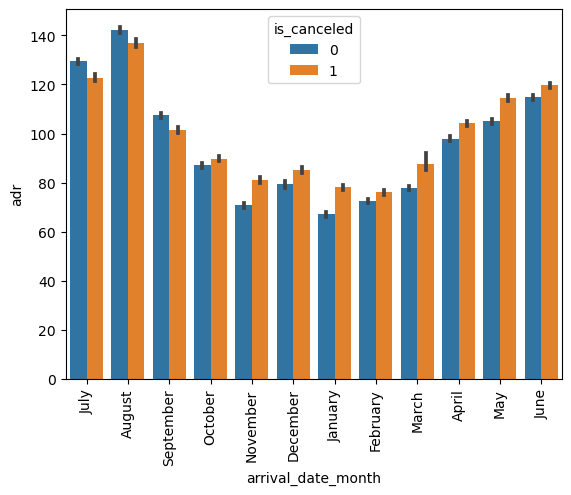

In [44]:
sns.barplot(x='arrival_date_month',y='adr',data=data ,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

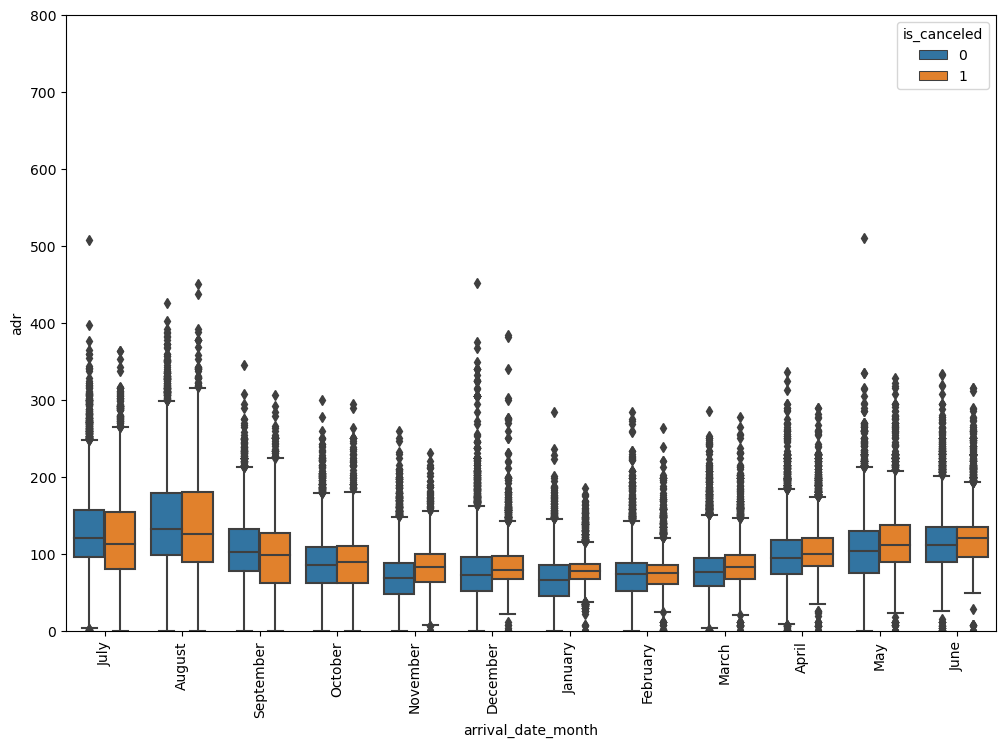

In [45]:
plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month',y='adr',data=data ,hue='is_canceled')
plt.xticks(rotation='vertical')


plt.ylim(0,800)
plt.show()

## Lets analyse whether bookings were made only for weekdays or for weekends or for both 

In [46]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [47]:
### Lets create a relationship table..
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
## lets define our own function :

def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1] >0 :
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0 :
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0 :
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

In [49]:
df2['weekend_or_weekday']=df2.apply(week_function,axis=1)

In [50]:
df2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data


In [51]:
df2['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    37617
stay_just_weekdays             31817
stay_just_weekend               5052
undefined_data                   680
Name: weekend_or_weekday, dtype: int64

In [52]:
type(sd)

module

In [53]:
df2=sd.Sort_Dataframeby_Month(df2,'arrival_date_month')
df2.groupby(['arrival_date_month','weekend_or_weekday']).size()


arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3632
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_both_weekdays_weekends    4938
                    stay_just_weekdays             3141
                    stay_just_weekend               510
                    undefined_data                   49
December            stay_both_weekdays_weekends    1905
                    stay_just_weekdays             2125
                    stay_just_weekend               298
                    undefined_data                   81
February            stay_both_weekdays_weekends    2442
                    stay_just_weekdays             2517
                    stay_just_weekend               360
                    undefined_data                   53
January             stay_both_weekdays_weekends    1553


In [54]:
group_data=df2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')
sorted_data.set_index('arrival_date_month',inplace=True)

In [55]:
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1553,2126,393,50
February,2442,2517,360,53
March,3160,3061,360,64
April,3632,2559,344,30
May,3446,3021,570,77
June,3244,2687,433,40
July,4576,2822,462,59
August,4938,3141,510,49
September,3196,2695,479,22


<Axes: xlabel='arrival_date_month'>

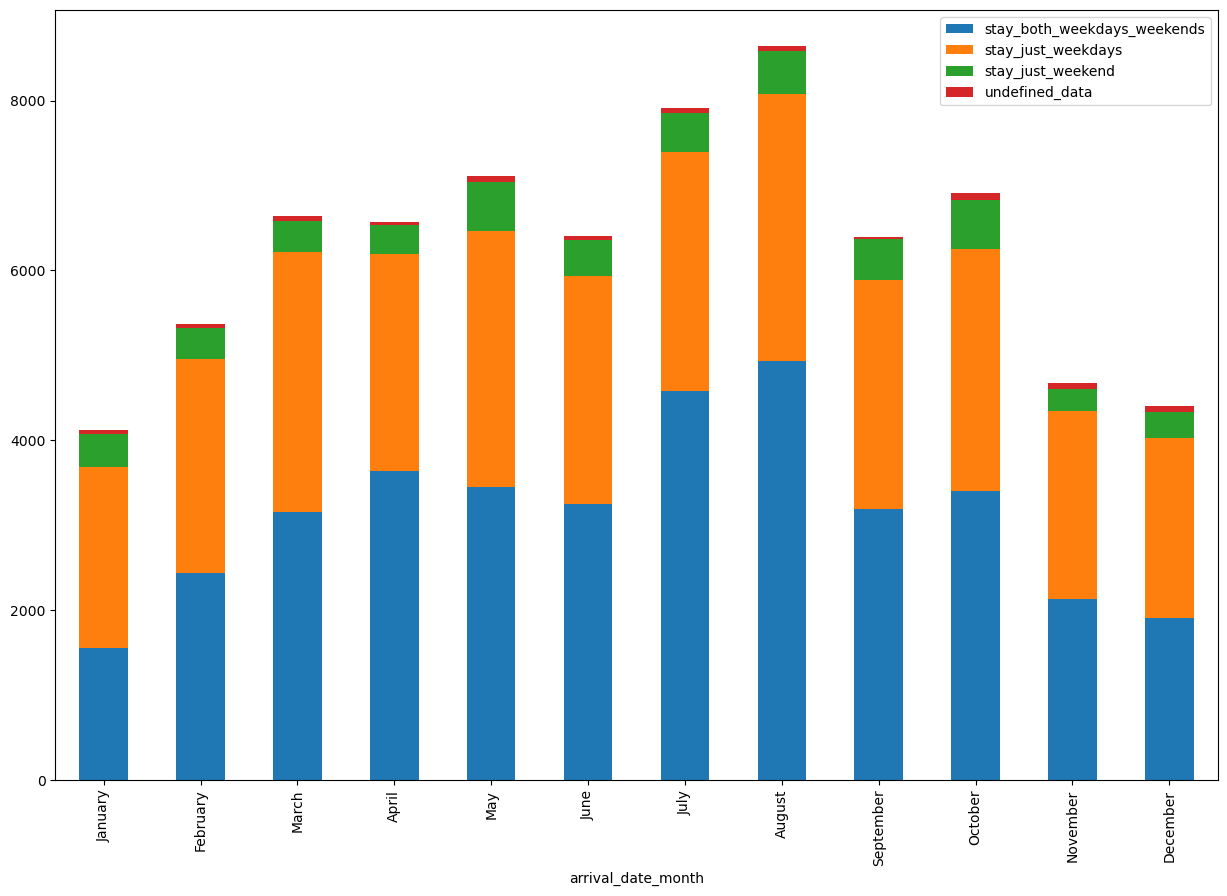

In [56]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

In [57]:
cate_features=[col for col in data.columns if data[col].dtype=='object']
num_features=[col for col in data.columns if data[col].dtype!='object']
data_cat=data[cate_features]


In [58]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [59]:
data_cat['cancellation']=data['is_canceled']
cols=data_cat.columns
cols=cols[0:-1]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [60]:
### Perform Mean Encoding Technique 

for col in cols:
    dict2=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)

In [61]:
data_cat.head(5)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.28402,0.407864,0.0,0.800000,0
1,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.28402,0.407864,0.0,0.800000,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.28402,0.407864,0.0,0.985075,0
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.28402,0.407864,0.0,0.985075,0
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.28402,0.407864,0.0,0.522876,0


# Handle Outliers

In [62]:
df[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,109,2016,1,1,0,1,2,0.0,0,0,0,0,0,0,59.94,0,1
1,0,109,2016,1,1,0,1,2,2.0,0,0,0,0,0,0,116.10,1,1
2,1,2,2016,1,1,0,1,2,0.0,0,0,0,0,0,0,89.00,0,1
3,0,88,2016,1,1,0,2,2,0.0,0,0,0,0,0,0,73.46,0,2
4,1,20,2016,1,1,0,2,2,2.0,0,0,0,0,0,0,119.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,2,1.0,0,0,0,0,4,0,117.82,0,1
119206,0,17,2016,53,30,2,5,2,0.0,0,0,0,0,0,0,90.34,0,1
119207,0,107,2016,53,31,2,5,2,0.0,0,0,0,0,0,0,103.57,0,0
119208,0,310,2016,53,27,2,10,2,0.0,0,0,0,0,2,0,68.57,0,2


In [63]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [64]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'cancellation', 'is_canceled', 'lead_time',
       'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [65]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [66]:
dataframe.head(5)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.28402,0.407864,...,0.0,0,0,0,0,3,0,0.0,0,0
1,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.28402,0.407864,...,0.0,0,0,0,0,4,0,0.0,0,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.28402,0.407864,...,0.0,0,0,0,0,0,0,75.0,0,0
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.28402,0.407864,...,0.0,0,0,0,0,0,0,75.0,0,0
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.28402,0.407864,...,0.0,0,0,0,0,0,0,98.0,0,1


<Axes: xlabel='lead_time', ylabel='Density'>

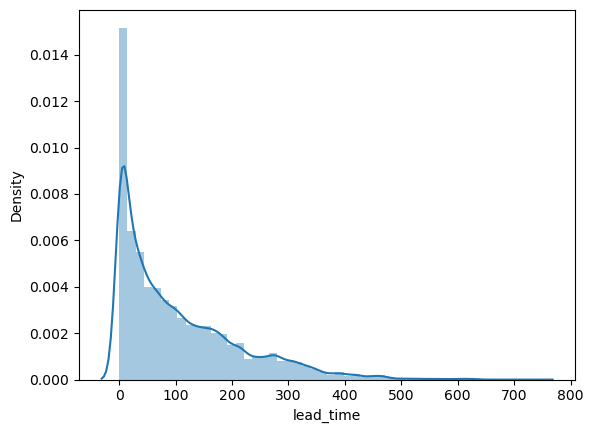

In [67]:
sns.distplot(dataframe['lead_time'])

In [68]:
def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])
    

<Axes: xlabel='lead_time', ylabel='Density'>

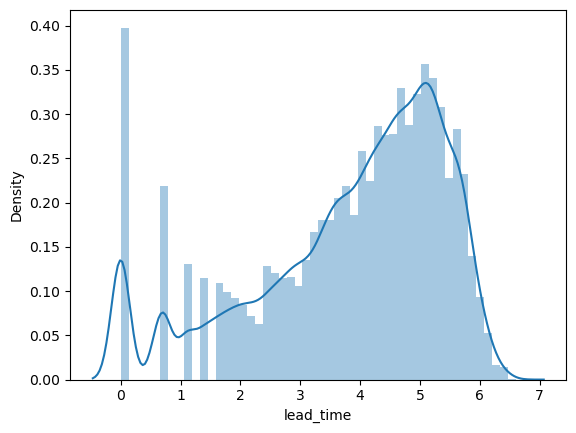

In [69]:
handle_outlier('lead_time')
sns.distplot(dataframe['lead_time'])

<Axes: xlabel='adr', ylabel='Density'>

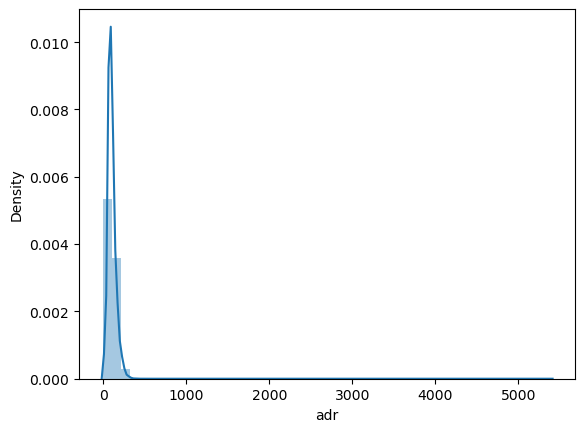

In [70]:
sns.distplot(dataframe['adr'])

## Select important Features using Co-relation & univariate analysis

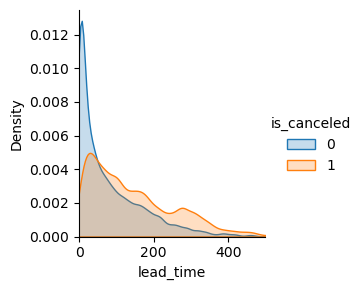

In [71]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend()

In [72]:
corr=dataframe.corr()
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,0.172797,-0.008378,...,-0.044013,-0.043386,-0.052526,-0.012261,-0.004467,-0.076598,0.072725,0.098522,-0.218961,-0.043478
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,0.057525,-0.029636,...,0.022446,-0.002404,-0.057691,0.008800,-0.021971,-0.011049,0.029164,0.280913,-0.021910,0.002763
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.047547,0.105767,...,0.000107,0.003992,0.009827,0.103606,0.011109,-0.027189,-0.031562,-0.034308,0.003455,0.006875
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,0.395706,-0.029320,...,-0.048518,0.009981,0.153305,0.093266,0.091795,-0.061513,0.067054,-0.132603,0.007613,-0.200822
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,0.396655,-0.265606,...,-0.089115,-0.049534,-0.169328,0.074710,-0.117519,-0.057578,0.096385,-0.113251,-0.145726,-0.155463
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,0.115593,-0.023234,...,-0.014723,-0.039949,-0.206695,-0.003868,-0.142650,-0.118461,0.048001,0.044939,-0.146562,0.075047
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,0.201783,-0.143390,...,-0.175086,-0.030096,0.032507,0.049290,0.022533,-0.040134,0.068336,-0.301822,-0.093401,-0.161406
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,0.263340,-0.084025,...,-0.204634,-0.045617,-0.028268,0.063309,-0.003205,-0.096277,0.067129,-0.184677,-0.131035,-0.135337
deposit_type,0.172797,0.057525,0.047547,0.395706,0.396655,0.115593,0.201783,0.263340,1.000000,0.122337,...,-0.096746,-0.030449,-0.057935,0.143317,-0.031487,-0.120846,0.120158,-0.088681,-0.095164,-0.268060
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,0.122337,1.000000,...,0.095062,0.021618,0.002727,-0.021358,0.024716,-0.095486,-0.101833,0.175360,0.061786,0.137114


In [73]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_type                      0.481530
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
reserved_room_type                0.072769
arrival_date_month                0.069886
adults                            0.058182
days_in_waiting_list              0.054301
meal                              0.050584
adr                               0.046492
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
children                          0.004851
stays_in_weekend_nights          -0.001323
arrival_dat

In [74]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_type', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'reserved_room_type', 'arrival_date_month',
       'adults', 'days_in_waiting_list', 'meal', 'adr', 'stays_in_week_nights',
       'arrival_date_year', 'arrival_date_week_number', 'children',
       'stays_in_weekend_nights', 'arrival_date_day_of_month', 'babies',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [75]:
features_to_drop=['reservation_status', 'reservation_status_date','arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [76]:
dataframe.shape

(119210, 24)

## separate dependent & independent features

In [77]:
x=dataframe.drop('is_canceled',axis=1)
y=dataframe['is_canceled']

In [78]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [79]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [80]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True])

In [81]:
cols=x.columns

In [82]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'lead_time', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [83]:
# let's print the number of selected features

selected_feature=cols[feature_sel_model.get_support()]
selected_feature

Index(['country', 'deposit_type', 'lead_time', 'stays_in_week_nights',
       'adults', 'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [84]:
x=x[selected_feature]

In [85]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119210, dtype: int64

# Lets build ML model

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.20)


In [87]:
X_train.shape

(95368, 12)

In [88]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [89]:
pred=logreg.predict(X_test)

In [90]:
pred

array([0, 0, 0, ..., 0, 0, 1])

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[13693,  1218],
       [ 3590,  5341]])

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7983390655146381

# How to cross-validate model

In [93]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,x,y,cv=10)
score

array([0.7789615 , 0.74356178, 0.84808321, 0.73374717, 0.71839611,
       0.79129268, 0.75874507, 0.81008305, 0.79481587, 0.89321366])

In [94]:
score.mean()

0.7870900092274138

# playing with multiple algos

In [95]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [96]:
models=[]

models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive_bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

In [97]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    
    predictions=model.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    print(acc)
    print('\n')

LogisticRegression
[[13693  3590]
 [ 1218  5341]]
0.7983390655146381


Naive_bayes
[[7688 1127]
 [7223 7804]]
0.6497777032128177


Random Forest
[[13613  2161]
 [ 1298  6770]]
0.8549198892710344


Decision_tree
[[12762  2056]
 [ 2149  6875]]
0.823630567905377


KNN
[[13109  2829]
 [ 1802  6102]]
0.8057629393507256


